In [44]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib

In [45]:
df=pd.read_csv(r"C:\Users\dell\Desktop\Rohith\heart.csv")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [47]:
print(df.isna().sum())
print(df.duplicated().sum())
print(df.duplicated())
print(df.drop_duplicates(inplace=True))

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64
1
0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool
None


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'chest_pain_type'),
  Text(3, 0, 'resting_bp'),
  Text(4, 0, 'cholestoral'),
  Text(5, 0, 'fasting_blood_sugar'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'max_hr'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'num_major_vessels'),
  Text(12, 0, 'thal'),
  Text(13, 0, 'target')])

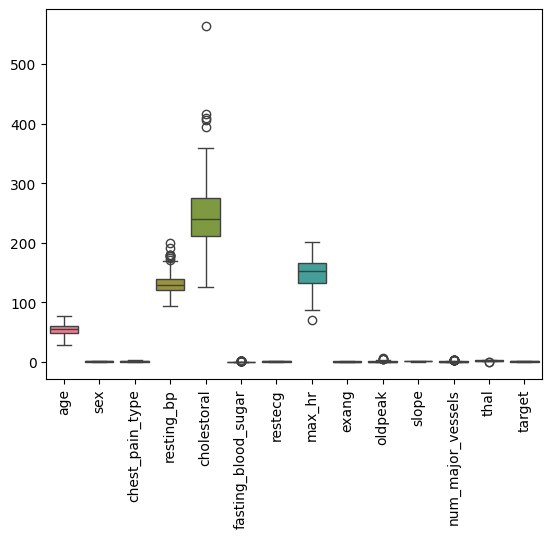

In [48]:

sns.boxplot(data=df)
plt.xticks(rotation=90)

In [49]:
df["z_score"]=(df["resting_bp"]-df["resting_bp"].mean())/df["resting_bp"].std()
df["z_score"]=(df["cholestoral"]-df["cholestoral"].mean())/df["cholestoral"].std()
df["z_score"]=(df["fasting_blood_sugar"]-df["fasting_blood_sugar"].mean())/df["fasting_blood_sugar"].std()
df["z_score"]=(df["max_hr"]-df["max_hr"].mean())/df["max_hr"].std()
df["z_score"]=(df["oldpeak"]-df["oldpeak"].mean())/df["oldpeak"].std()
df["z_score"]=(df["num_major_vessels"]-df["num_major_vessels"].mean())/df["num_major_vessels"].std()
df["z_score"]=(df["thal"]-df["thal"].mean())/df["thal"].std()

threshold=1
df_no_outliers=df[df["z_score"].abs()<=threshold]
df_no_outliers=df_no_outliers.drop(columns=["z_score"])
print(df_no_outliers)

     age  sex  chest_pain_type  resting_bp  cholestoral  fasting_blood_sugar  \
1     37    1                2         130          250                    0   
2     41    0                1         130          204                    0   
3     56    1                1         120          236                    0   
4     57    0                0         120          354                    0   
6     56    0                1         140          294                    0   
..   ...  ...              ...         ...          ...                  ...   
279   61    1                0         138          166                    0   
286   59    1                3         134          204                    0   
287   57    1                1         154          232                    0   
296   63    0                0         124          197                    0   
302   57    0                1         130          236                    0   

     restecg  max_hr  exang  oldpeak  s

                          age       sex  chest_pain_type  resting_bp  \
age                  1.000000 -0.094962        -0.063107    0.283121   
sex                 -0.094962  1.000000        -0.051740   -0.057647   
chest_pain_type     -0.063107 -0.051740         1.000000    0.046486   
resting_bp           0.283121 -0.057647         0.046486    1.000000   
cholestoral          0.207216 -0.195571        -0.072682    0.125256   
fasting_blood_sugar  0.119492  0.046022         0.096018    0.178125   
restecg             -0.111590 -0.060351         0.041561   -0.115367   
max_hr              -0.395235 -0.046439         0.293367   -0.048023   
exang                0.093216  0.143460        -0.392937    0.068526   
oldpeak              0.206040  0.098322        -0.146692    0.194600   
slope               -0.164124 -0.032990         0.116854   -0.122873   
num_major_vessels    0.302261  0.113060        -0.195356    0.099248   
thal                 0.065317  0.211452        -0.160370    0.06

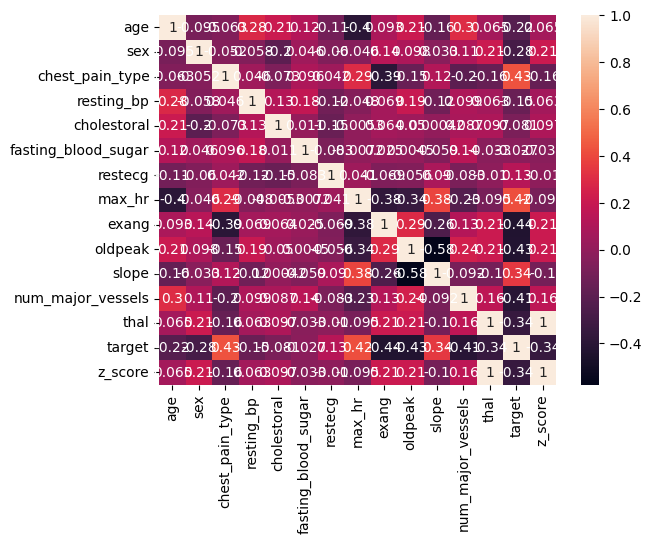

In [50]:
correlation=df.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation,annot=True)
plt.show()

In [51]:
x=df.iloc[:,:12]
print(x)
y=df["chest_pain_type"]

     age  sex  chest_pain_type  resting_bp  cholestoral  fasting_blood_sugar  \
0     63    1                3         145          233                    1   
1     37    1                2         130          250                    0   
2     41    0                1         130          204                    0   
3     56    1                1         120          236                    0   
4     57    0                0         120          354                    0   
..   ...  ...              ...         ...          ...                  ...   
298   57    0                0         140          241                    0   
299   45    1                3         110          264                    0   
300   68    1                0         144          193                    1   
301   57    1                0         130          131                    0   
302   57    0                1         130          236                    0   

     restecg  max_hr  exang  oldpeak  s

In [52]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size= 0.2, random_state=0)

In [53]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [54]:
x_train

array([[-1.30504994, -1.4186261 ,  0.98544689, ..., -0.73105097,
        -0.61492051, -0.70674006],
       [ 1.25925059, -1.4186261 ,  0.98544689, ..., -0.89828712,
        -0.61492051,  0.29516791],
       [ 0.36731998,  0.70490738,  0.98544689, ..., -0.89828712,
         0.99590387, -0.70674006],
       ...,
       [ 0.14433732,  0.70490738,  1.94307874, ...,  0.6904563 ,
        -0.61492051, -0.70674006],
       [-0.85908463,  0.70490738,  0.98544689, ..., -0.89828712,
         0.99590387, -0.70674006],
       [ 0.36731998,  0.70490738,  0.98544689, ...,  1.77749128,
         0.99590387,  1.29707587]], shape=(241, 12))

In [55]:
y_train

74     2
153    2
64     2
296    0
288    0
      ..
252    0
193    0
117    3
47     2
173    2
Name: chest_pain_type, Length: 241, dtype: int64

In [56]:
x_test

array([[ 0.81328528,  0.70490738,  0.02781503, -0.67462818,  0.65089023,
        -0.40527917, -0.97525383, -1.96657306, -0.6983225 ,  0.27236593,
        -0.61492051,  0.29516791],
       [ 1.03626794,  0.70490738,  1.94307874,  2.19385084, -0.36856884,
        -0.40527917, -0.97525383,  0.23525787, -0.6983225 , -0.39657867,
        -0.61492051, -0.70674006],
       [ 1.03626794,  0.70490738,  0.98544689, -0.38778028,  1.17949864,
        -0.40527917,  0.90503556, -0.78097179,  1.43200311,  0.60683823,
        -0.61492051, -0.70674006],
       [ 0.36731998,  0.70490738, -0.92981682,  1.04645923,  0.44322264,
        -0.40527917, -0.97525383, -1.62782984,  1.43200311, -0.22934252,
         0.99590387, -0.70674006],
       [ 0.81328528,  0.70490738,  0.98544689, -0.10093237, -0.29305336,
        -0.40527917,  0.90503556, -0.14582825, -0.6983225 ,  0.60683823,
        -0.61492051,  2.29898383],
       [ 0.14433732, -1.4186261 , -0.92981682,  0.12854595,  3.06738581,
        -0.40527917, -

In [57]:
y_test

226    1
152    3
229    2
202    0
52     2
      ..
146    2
302    1
26     2
108    1
89     0
Name: chest_pain_type, Length: 61, dtype: int64

In [58]:

from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
print(y_pred)
print("Prediction comparison")
predict_1=pd.DataFrame({"Y_test":y_test,"Y-pred":y_pred})
print(predict_1.to_string())
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

[0 2 0 0 2 0 0 0 0 0 2 1 0 1 2 2 0 2 0 1 0 0 0 0 1 0 0 2 2 0 0 0 1 2 1 0 0
 0 0 0 0 0 2 0 2 1 2 0 0 2 1 0 2 0 1 2 2 1 1 1 0]
Prediction comparison
     Y_test  Y-pred
226       1       0
152       3       2
229       2       0
202       0       0
52        2       2
246       0       0
176       0       0
169       0       0
224       0       0
218       0       0
111       2       2
135       0       1
219       0       0
12        1       1
15        2       2
66        2       2
97        0       0
90        2       2
199       0       0
103       2       1
22        0       0
213       0       0
227       0       0
265       0       0
133       1       1
217       0       0
276       0       0
271       3       2
154       2       2
55        1       0
195       0       0
256       0       0
134       1       1
8         2       2
157       1       1
242       0       0
241       0       0
81        1       0
215       0       0
168       0       0
5         0       0
59        0  

In [59]:
# from sklearn.ensemble import AdaBoostClassifier
# model=AdaBoostClassifier(n_estimators=50,learning_rate=1)
# model.fit(x_train,y_train)
# y_pred=model.predict(x_test)
# accuracy=accuracy_score(y_test,y_pred)
# print("Accuracy:",(accuracy*100))